## The objective of this code is to train a network in order to automatically adress the angle of a basal body 'isolated' on a image.


#### Two approaches (will) has been tested: 
- a classification method where each one of the 36 classes correspond to an angle of 10°
- a regressive method to get the 'exact' orientation of the basal bodies.  
  
.  
_**Important: So far (31 May 2020) Only the classification method is implemented**_
.  

In [66]:
# Define the method to use
problem = 'classification'

**Define working path**

In [67]:
cd c:\Users\breto\Desktop\Data_Analysis\Schmidtea_CNN\

c:\Users\breto\Desktop\Data_Analysis\Schmidtea_CNN


**Import modules**  

The full requirement on which the model was train can be found on the GitHub

In [68]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt

# To save 
import csv

if torch.cuda.is_available():                                  # Personal comment: Here rise an error if GPU not available
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    
print('Using PyTorch version:', torch.__version__, ' Device:', device)

Using PyTorch version: 1.4.0  Device: cuda


### Data loading


In [69]:
from sklearn.model_selection import train_test_split

x = np.load('centriole_img_32pixels.npy')
y = np.load('centriole_angle_32pixels.npy')

x = x.astype('float64')

In [62]:
x_min = x.min(axis=(1,2), keepdims=True)
x_max = x.max(axis=(1,2), keepdims=True)

In [63]:
toti = (x-x_min)/(x_max-x_min)

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [65]:
for i in range(x.shape[0]):
    if x[i].min() == x[i].max():
        print(i)

13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
13443
13444
13445
13446
13447
13448
13449
13450
13451
13452
13453
13454
13455
13456
13457
13458
13459
13460
13461
13462
13463
13464
13465
13466
13467
13468
13469
13470
13471
13472
13473
13474
13475
13476
13477
13478
13479
13480
13481
13482
13483
13484
13485
13486
13487
13488
13489
13490
13491
13492
13493
13494
13495
13496
13497
13498
13499
13500
13501
13502
13503
13504
13505
13506
13507
13508
13509
13510
13511
13512
13513
13514
13515
13516
13517
13518
13519
13520
13521
13522
13523
13524
13525
13526
13527
13528
13529
13530
13531
13532
13533
13534
13535
13536
13537
13538
13539
13540
13541
13542
13543
13544
13545
13546
13547
13548
13549
13550
13551
13552
13553
13554
13555
13556
13557
13558
13559
13560
13561
13562
13563
13564
13565
13566
1356

14766
14767
14768
14769
14770
14771
14772
14773
14774
14775
14776
14777
14778
14779
14780
14781
14782
14783
14784
14785
14786
14787
14788
14789
14790
14791
14792
14793
14794
14795
14796
14797
14798
14799
14800
14801
14802
14803
14804
14805
14806
14807
14808
14809
14810
14811
14812
14813
14814
14815
14816
14817
14818
14819
14820
14821
14822
14823
14824
14825
14826
14827
14828
14829
14830
14831
14832
14833
14834
14835
14836
14837
14838
14839
14840
14841
14842
14843
14844
14845
14846
14847
14848
14849
14850
14851
14852
14853
14854
14855
14856
14857
14858
14859
14860
14861
14862
14863
14864
14865
14866
14867
14868
14869
14870
14871
14872
14873
14874
14875
14876
14877
14878
14879
14880
14881
14882
14883
14884
14885
14886
14887
14888
14889
14890
14891
14892
14893
14894
14895
14896
14897
14898
14899
14900
14901
14902
14903
14904
14905
14906
14907
14908
14909
14910
14911
14912
14913
14914
14915
14916
14917
14918
14919
14920
14921
14922
14923
14924
14925
14926
14927
14928
14929
14930
14931
1493

16131
16132
16133
16134
16135
16136
16137
16138
16139
16140
16141
16142
16143
16144
16145
16146
16147
16148
16149
16150
16151
16152
16153
16154
16155
16156
16157
16158
16159
16160
16161
16162
16163
16164
16165
16166
16167
16168
16169
16170
16171
16172
16173
16174
16175
16176
16177
16178
16179
16180
16181
16182
16183
16184
16185
16186
16187
16188
16189
16190
16191
16192
16193
16194
16195
16196
16197
16198
16199
16200
16201
16202
16203
16204
16205
16206
16207
16208
16209
16210
16211
16212
16213
16214
16215
16216
16217
16218
16219
16220
16221
16222
16223
16224
16225
16226
16227
16228
16229
16230
16231
16232
16233
16234
16235
16236
16237
16238
16239
16240
16241
16242
16243
16244
16245
16246
16247
16248
16249
16250
16251
16252
16253
16254
16255
16256
16257
16258
16259
16260
16261
16262
16263
16264
16265
16266
16267
16268
16269
16270
16271
16272
16273
16274
16275
16276
16277
16278
16279
16280
16281
16282
16283
16284
16285
16286
16287
16288
16289
16290
16291
16292
16293
16294
16295
16296
1629

17496
17497
17498
17499
17500
17501
17502
17503
17504
17505
17506
17507
17508
17509
17510
17511
17512
17513
17514
17515
17516
17517
17518
17519
17520
17521
17522
17523
17524
17525
17526
17527
17528
17529
17530
17531
17532
17533
17534
17535
17536
17537
17538
17539
17540
17541
17542
17543
17544
17545
17546
17547
17548
17549
17550
17551
17552
17553
17554
17555
17556
17557
17558
17559
17560
17561
17562
17563
17564
17565
17566
17567
17568
17569
17570
17571
17572
17573
17574
17575
17576
17577
17578
17579
17580
17581
17582
17583
17584
17585
17586
17587
17588
17589
17590
17591
17592
17593
17594
17595
17596
17597
17598
17599
17600
17601
17602
17603
17604
17605
17606
17607
17608
17609
17610
17611
17612
17613
17614
17615
17616
17617
17618
17619
17620
17621
17622
17623
17624
17625
17626
17627
17628
17629
17630
17631
17632
17633
17634
17635
17636
17637
17638
17639
17640
17641
17642
17643
17644
17645
17646
17647
17648
17649
17650
17651
17652
17653
17654
17655
17656
17657
17658
17659
17660
17661
1766

54556
54557
54558
54559
54560
54561
54562
54563
54564
54565
54566
54567
54568
54569
54570
54571
54572
54573
54574
54575
54576
54577
54578
54579
54580
54581
54582
54583
54584
54585
54586
54587
54588
54589
54590
54591
54592
54593
54594
54595
54596
54597
54598
54599
54600
54601
54602
54603
54604
54605
54606
54607
54608
54609
54610
54611
54612
54613
54614
54615
54616
54617
54618
54619
54620
54621
54622
54623
54624
54625
54626
54627
54628
54629
54630
54631
54632
54633
54634
54635
54636
54637
54638
54639
54640
54641
54642
54643
54644
54645
54646
54647
54648
54649
54650
54651
54652
54653
54654
54655
54656
54657
54658
54659
54660
54661
54662
54663
54664
54665
54666
54667
54668
54669
54670
54671
54672
54673
54674
54675
54676
54677
54678
54679
54680
54681
54682
54683
54684
54685
54686
54687
54688
54689
54690
54691
54692
54693
54694
54695
54696
54697
54698
54699
54700
54701
54702
54703
54704
54705
54706
54707
54708
54709
54710
54711
54712
54713
54714
54715
54716
54717
54718
54719
54720
54721
5472

### Normalisation of the images

In [44]:
x = x.astype('float64')

x_min = x.min(axis=(1, 2), keepdims=True)
x_max = x.max(axis=(1, 2), keepdims=True)
print(x_min, x_max)

x = (x - x_min)/(x_max-x_min)

[[[[0.04638219 0.04545455 0.04267161 ... 0.01205937 0.01298701
    0.00927644]]]


 [[[0.01382887 0.01728608 0.02247191 ... 0.03457217 0.05531547
    0.06568712]]]


 [[[0.00883002 0.0125092  0.00588668 ... 0.01030169 0.01030169
    0.01545254]]]


 ...


 [[[0.         0.         0.         ... 0.03896104 0.03896104
    0.02597403]]]


 [[[0.         0.         0.         ... 0.00943396 0.00943396
    0.00943396]]]


 [[[0.03225806 0.03225806 0.0483871  ... 0.         0.
    0.        ]]]] [[[[0.45732839 0.39517625 0.36178108 ... 0.52040816 0.4619666
    0.44341373]]]


 [[[0.27571305 0.24114088 0.28867761 ... 0.71823682 0.82022472
    0.80466724]]]


 [[[0.4790287  0.40103017 0.35467255 ... 0.36644592 0.35467255
    0.32303164]]]


 ...


 [[[0.28571429 0.24675325 0.19480519 ... 0.14285714 0.15584416
    0.22077922]]]


 [[[0.09433962 0.12264151 0.16037736 ... 0.22641509 0.16037736
    0.09433962]]]


 [[[0.20967742 0.16129032 0.14516129 ... 0.75806452 0.91935484
    1.        ]]]]


c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


In [ ]:
x = x.reshape((x.shape[0],1,32,32))

### 'Classification' of the angle

In [71]:
# For Classification method, transformation of the angle into class of n degree
n=10

if problem == 'classification':
    for j in range(y.shape[0]):
        if y[j] == 0:
            y[j] == 1
        else:
            i=0
            while (i*n) <= y[j]:
                i += 1
            y[j]=i
        if y[j] > 35:
            y[j] = 0

In [72]:
# Define the size of the batch to train the model more efficiently
batch_size = 50

# Split Data in train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# Transform the np array as adapted Tensor type
torch_x_train = torch.from_numpy(x_train).type(torch.float)
torch_x_test = torch.from_numpy(x_train).type(torch.float)

if problem == 'classification':
    torch_y_train = torch.from_numpy(y_train).type(torch.LongTensor)
    torch_y_test = torch.from_numpy(y_train).type(torch.LongTensor)
    
else:
    torch_y_train = torch.from_numpy(y_train).type(torch.float)
    torch_y_test = torch.from_numpy(y_train).type(torch.float)

# Append the images (x) to the the output (~angle, y)
training = torch.utils.data.TensorDataset(torch_x_train,torch_y_train)
testing = torch.utils.data.TensorDataset(torch_x_test,torch_y_test)

# Use the DataLoader class of PyTorch
train_loader = torch.utils.data.DataLoader(training, batch_size = batch_size, shuffle = True)
validation_loader = torch.utils.data.DataLoader(testing, batch_size = batch_size, shuffle = False)

**Data format checking**

In [73]:
# Check the format of (1 batch) of the loader
for (x_train, y_train) in train_loader:
    print('x_train:', x_train.size(), 'type:', x_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break
    
for (x_train, y_train) in validation_loader:
    print('x_train:', x_train.size(), 'type:', x_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

x_train: torch.Size([50, 32, 32]) type: torch.FloatTensor
y_train: torch.Size([50]) type: torch.LongTensor
x_train: torch.Size([50, 32, 32]) type: torch.FloatTensor
y_train: torch.Size([50]) type: torch.LongTensor


### Example of images. 
In this project we want to orient the basal bodies (BBs) thanks to the direction pointed by its rootlet. As you can see on the images, BBs can be close one to each other but the only annotated BB on each picture is suppose to be the one the closer to the center of the image. The neighbour BB might be annotated in another image.

A shortcut is to consider that the BB correspond to the bright dot and the rootlet is the thin comet that emanate from it. To be more precise from a biological point of view, on these immunofluorescent images,  _Schmidtea Mediterranea_ was immunolabelled with anti-rootletin antibody and the bright dot correspond to the anchorage site of the rootlet at the BB. 
This site is not perfectly centered with the BB.

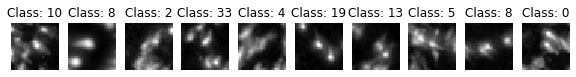

In [78]:
pltsize=1
plt.figure(figsize=(10*pltsize, pltsize))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(X_train[i,:,:,:].numpy().reshape(32,32), cmap="gray")
    plt.title('Class: '+str(y_train[i].item()))

### Architecture of the Convolution Neural Network.

AlexNet was used as backbone of this CNN. As the images of the BBs are quite small (32*32) and in greyscale, I change most of the kernel size, padding and stride of Convolutional layer and Pooling Layer in order to don't reduce too much the output of each layer (The size of image and numbers of neurones is precise in the convolution block)

In [21]:
class SchmidteaNet(nn.Module):

    def __init__(self, num_classes=36):
        super(SchmidteaNet, self).__init__()
        self.features = nn.Sequential(                              # 32 * 32
            nn.Conv2d(1, 64, kernel_size=5, padding =2),            # 32 * 32  * 64            
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2),                            # 16 * 16 * 64
            nn.Conv2d(64, 192, kernel_size=3, padding=1),           # 16 * 16 * 192
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(192),
            nn.MaxPool2d(kernel_size=2),                            # 8 * 8 * 192
            nn.Conv2d(192, 384, kernel_size=3, padding=1),          # 8 * 8 * 384
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(384),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),          # 8 * 8 * 256
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(256),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),          # 8 * 8 * 256
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(kernel_size=2, stride=2),                  # 4 * 4 * 256 
        )
        self.avgpool = nn.AdaptiveAvgPool2d((4, 4))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 4 * 4, 4096),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(4096),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(4096),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


**Model instanciation + transfer to device**  
By default, the device is the GPU  
!! Take Care, if GPU is not available the model will learn on CPU !!

**Choice of the optimizer**  
By default, Stochastic Gradient Descent is use as optimizer

**Choice of the criterion**  
By default, the loss function is set to Cross Entropy for classification and Mean Square Error for regression

In [22]:
model = SchmidteaNet().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.)

if problem == 'classification':
    criterion = nn.CrossEntropyLoss()
else: 
    criterion = nn.MSELoss() #Do not use MSE it would be stupid


#### Definition of the 'train()' and 'test()' function to make the model learn  


In [23]:
def train(model, optimizer, epoch, log_interval=200):
    # Set model to training mode
    model.train()
    
    # Loop over each batch from the training set
    for batch_idx, (data, target) in enumerate(train_loader):
        
        # Copy data to GPU if needed
        data = data.to(device)
        target = target.to(device)

        # Zero gradient buffers
        optimizer.zero_grad() 
        
        # Pass data through the network
        output = model(data)

        # Calculate loss
        loss = criterion(output, target)

        # Backpropagate
        loss.backward()
        
        # Update weights
        optimizer.step()
        
        # Print advancement of the code
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item()))

In [24]:
def validate(model, loss_vector, accuracy_vector):
    '''
    Input of the function:
        model: neural network model in Pytorch
        loss_vector: empty array with is assigned by the function
        accuracy_vector: empty array with is assigned by the function
    '''
    val_loss, correct = 0, 0
    for data, target in validation_loader:
        # Copy data to GPU if needed
        data = data.to(device)
        target = target.to(device)
        # Pass data through the network
        output = model(data)
        val_loss += criterion(output, target).data.item()
        # get the index of the max log-probability
        pred = output.data.max(1)[1] 
        correct += pred.eq(target.data).cpu().sum()
    val_loss /= len(validation_loader)
    loss_vector.append(val_loss)
    accuracy = 100. * correct.to(torch.float32) / len(validation_loader.dataset)
    accuracy_vector.append(accuracy)
    
    # At the end of an epoch, print the precision of the current model weight
    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'
            .format(val_loss, correct, len(validation_loader.dataset), accuracy))

### Training of the model

In [25]:
%%time

# Define the number of epochs to train the model
epochs = 300

# Instantiate variable to log loss and accuracy
lossv, accv = [], []

# Let's Train!!
for epoch in range(1, epochs + 1):
    train(model, optimizer, epoch)
    validate(model, lossv, accv)

Train Epoch: 1 [0/44637 (0%)]	Loss: 3.811472


KeyboardInterrupt: 

**Save the model (as well as the log of loss and accuracy)**  
Take care to the name

In [28]:
torch.save(model.state_dict(),'SchmidteaNet_batch100_3000epochs')

with open('accv.csv', 'w', newline='') as myfile:
     wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
     wr.writerow(accv)
    
with open('lossv.csv', 'w', newline='') as myfile:
     wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
     wr.writerow(lossv)

### Plot Accuracy and Loss evolution

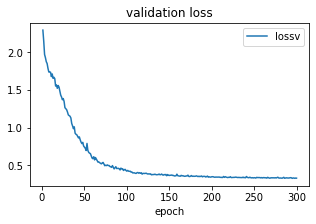

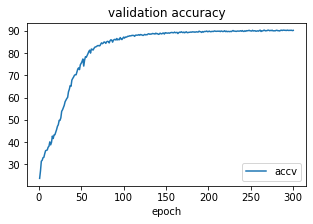

In [32]:
plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), lossv, label='lossv')
plt.legend(loc='upper right');
plt.xlabel('epoch')
plt.title('validation loss')
plt.show()

plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), accv, label='accv')
plt.legend(loc='lower right');
plt.xlabel('epoch')
plt.title('validation accuracy');

## Small resume of the model

In [36]:
# Function to count the number of parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# print the CNN architecture
print(model.parameters)

# print the numbers of parameters in the CNN
print("\nTotal number of parameters {}\n".format(count_parameters(model)))

<bound method Module.parameters of AlexNet(
  (features): Sequential(
    (0): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU(inplace=True)
    (6): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_run